In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
import re
#import pyreadr

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler, LinearDiscriminantAnalysis

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve, silhouette_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [2]:
#data_proyecto = pyreadr.read_r('data_encriptada.rds')

# Extraer el DataFrame contenido
#data_proyecto = data_proyecto[None]  # Usualmente el objeto principal está bajo la clave None
data_proyecto = pd.read_csv("C:/Users/Usuario/Desktop/UCR/CA-0417 Riesgos en Entidades Financieras I/Proyecto-Riesgo-/datos.csv")

data_proyecto

,IDENTIFICADOR,y_rango,y_dicotomica,x4,x5,x6,x7,x8,x9,x10,...,x103,x104,x105,x106,x107,x108,x109,x1,x2,x3
0,100913.0,y_0,0,2021-08-31,1,S,C,932.0,True,4.940656e-324,...,NaN,NaN,NaN,187313.297258,83616.305251,0.284405,0.357849,6151.726167,19.0,119255.573915
1,99176.0,y_30,0,2021-05-31,1,S,C,828.0,True,0.000000e+00,...,NaN,NaN,NaN,164352.312433,127734.957850,0.246262,0.309129,9591.393465,1.0,37411.199713
2,107305.0,y_30,0,2022-05-31,0,S,C,868.0,True,4.940656e-324,...,0.0,21.0,21.0,112131.529063,80433.365550,0.423221,0.467257,11251.425064,1.0,33641.425657
3,107539.0,y_30,0,2022-05-31,1,N,C,891.0,True,4.940656e-324,...,0.0,60.0,60.0,374626.594517,187313.297258,0.340834,0.360938,10138.006103,0.0,69805.958238
4,97503.0,y_30,0,2021-03-31,1,M,C,927.0,False,4.940656e-324,...,NaN,NaN,NaN,482180.681329,399735.279859,0.468886,0.589293,28548.623991,0.0,70557.339480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,96263.0,y_30,0,2021-02-28,0,M,C,978.0,False,4.940656e-324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,181157.899713
2319,96136.0,y_30,0,2021-02-28,1,M,C,924.0,False,4.940656e-324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,107827.161102
2320,96805.0,y_30,0,2021-02-28,1,M,C,828.0,False,0.000000e+00,...,NaN,NaN,NaN,114804.924126,89226.624968,0.459019,0.623195,18101.531467,1.0,46306.244967
2321,105061.0,y_30,0,2022-03-31,0,S,C,794.0,True,0.000000e+00,...,NaN,NaN,NaN,241694.577107,187845.526249,0.323695,0.340907,12605.183419,0.0,41210.746430


In [3]:
# Lista de las variables que deseas modificar
variables = ['x10', 'x13', 'x23', 'x32', 'x36', 'x44', 'x47', 'x48', 
             'x56', 'x57', 'x58', 'x59', 'x60', 'x67', 'x68', 'x68', 'x2']

# Crear un diccionario para almacenar el número de categorías por variable
num_categorias = {}

# Iterar sobre las variables y asignar categorías
for var in variables:
    # Reemplazar 'ND' por NaN (valor faltante)
    data_proyecto[var] = data_proyecto[var].replace('ND', np.nan)
    
    # Obtener los valores únicos de la variable, ignorando NaN
    unique_values = data_proyecto[var].dropna().unique()
    
    # Ordenar los valores únicos
    unique_values = sorted(unique_values)
    
    # Crear un diccionario de mapeo de valores a categorías
    value_to_category = {val: i+1 for i, val in enumerate(unique_values)}
    
    # Asegurar que la categoría 0 esté incluida
    value_to_category[np.nan] = 0  # Añadir la categoría para NaN (Desconocido)
    
    # Asignar las categorías a la variable
    data_proyecto[f'cat_{var}'] = data_proyecto[var].map(value_to_category)
    
    # Convertir a tipo categórico
    data_proyecto[f'cat_{var}'] = data_proyecto[f'cat_{var}'].astype('category')
    
    # Guardamos el número de categorías para cada variable
    num_categorias[var] = len(unique_values) + 1  # +1 por la categoría 'Desconocido'

# Imprimir cuántas categorías se asignaron a cada variable
print("\nNúmero de categorías por variable:")
print(num_categorias)

# Mostrar el dataframe con las nuevas columnas
data_proyecto




Número de categorías por variable:
{'x10': 14, 'x13': 13, 'x23': 6, 'x32': 4, 'x36': 49, 'x44': 6, 'x47': 9, 'x48': 7, 'x56': 7, 'x57': 4, 'x58': 4, 'x59': 12, 'x60': 19, 'x67': 5, 'x68': 5, 'x2': 25}


,IDENTIFICADOR,y_rango,y_dicotomica,x4,x5,x6,x7,x8,x9,x10,...,cat_x47,cat_x48,cat_x56,cat_x57,cat_x58,cat_x59,cat_x60,cat_x67,cat_x68,cat_x2
0,100913.0,y_0,0,2021-08-31,1,S,C,932.0,True,4.940656e-324,...,7,2,1,1,1,1,6,1,1,20
1,99176.0,y_30,0,2021-05-31,1,S,C,828.0,True,0.000000e+00,...,5,1,1,1,1,1,1,1,1,2
2,107305.0,y_30,0,2022-05-31,0,S,C,868.0,True,4.940656e-324,...,6,2,1,1,2,2,3,1,1,2
3,107539.0,y_30,0,2022-05-31,1,N,C,891.0,True,4.940656e-324,...,6,2,1,1,1,2,2,1,1,1
4,97503.0,y_30,0,2021-03-31,1,M,C,927.0,False,4.940656e-324,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,96263.0,y_30,0,2021-02-28,0,M,C,978.0,False,4.940656e-324,...,0,0,0,0,0,0,0,1,0,5
2319,96136.0,y_30,0,2021-02-28,1,M,C,924.0,False,4.940656e-324,...,0,0,0,0,0,0,0,1,0,3
2320,96805.0,y_30,0,2021-02-28,1,M,C,828.0,False,0.000000e+00,...,0,0,0,0,0,0,0,1,0,2
2321,105061.0,y_30,0,2022-03-31,0,S,C,794.0,True,0.000000e+00,...,5,1,1,1,1,1,1,1,1,1


In [4]:
# Lista de las variables que deseas modificar
variables = ['x10', 'x13', 'x23', 'x32', 'x36', 'x44', 'x47', 'x48', 
             'x56', 'x57', 'x58', 'x59', 'x60', 'x67', 'x68', 'x68', 'x2']

# Iterar sobre las variables y crear los dataframes con la columna original y categorizada
for var in variables:
    # Crear el dataframe para la variable con las dos columnas (original y categorizada)
    revisa = data_proyecto[[f'cat_{var}', var]].copy()
    
    # Mostrar las primeras 20 filas del dataframe
    print(f"Primeras 20 filas de {var}:")
    print(revisa.head(20))
    print("\n" + "-"*50)  # Separador para facilitar la lectura

Primeras 20 filas de x10:
   cat_x10            x10
0        2  4.940656e-324
1        1   0.000000e+00
2        2  4.940656e-324
3        2  4.940656e-324
4        2  4.940656e-324
5        2  4.940656e-324
6        1   0.000000e+00
7        2  4.940656e-324
8        1   0.000000e+00
9        1   0.000000e+00
10       1   0.000000e+00
11       1   0.000000e+00
12       2  4.940656e-324
13       1   0.000000e+00
14       2  4.940656e-324
15       2  4.940656e-324
16       3  9.881313e-324
17       2  4.940656e-324
18       1   0.000000e+00
19       1   0.000000e+00

--------------------------------------------------
Primeras 20 filas de x13:
   cat_x13            x13
0        2  4.940656e-324
1        1   0.000000e+00
2        1   0.000000e+00
3        1   0.000000e+00
4        2  4.940656e-324
5        1   0.000000e+00
6        1   0.000000e+00
7        1   0.000000e+00
8        1   0.000000e+00
9        1   0.000000e+00
10       1   0.000000e+00
11       1   0.000000e+00
12       1  

In [5]:
columnas_especificas = ['x8', 'x11', 'x12', 'x14', 'x15', 'x31', 'x33', 'x34', 
                        'x35', 'x40', 'x42', 'x51', 'x52', 'x53', 'x54', 'x55', 
                        'x61', 'x65', 'x69', 'x70', 'x71', 'x74', 'x75']

# Rellenar valores NA con la media solo en las columnas específicas si son numéricas
for columna in columnas_especificas:
    if pd.api.types.is_numeric_dtype(data_proyecto[columna]):
        media = data_proyecto[columna].mean()  # Calcula la media de la columna
        data_proyecto[columna].fillna(media, inplace=True)  # Rellena los NA con la media

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9208\1120422500.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_proyecto[columna].fillna(media, inplace=True)  # Rellena los NA con la media


In [6]:
datos_limpios_de_na = data_proyecto[['x8', 'x11', 'x12', 'x14', 'x15', 'x31', 'x33', 'x34', 
                        'x35', 'x40', 'x42', 'x51', 'x52', 'x53', 'x54', 'x55', 
                        'x61', 'x65', 'x69', 'x70', 'x71', 'x74', 'x75','cat_x10', 'cat_x13', 'cat_x23', 'cat_x32', 'cat_x36', 'cat_x44', 'cat_x47', 'cat_x48', 
             'cat_x56', 'cat_x57', 'cat_x58', 'cat_x59', 'cat_x60', 'cat_x67', 'cat_x68', 'cat_x68', 'cat_x2']].copy()




datos_limpios_de_na

,x8,x11,x12,x14,x15,x31,x33,x34,x35,x40,...,cat_x48,cat_x56,cat_x57,cat_x58,cat_x59,cat_x60,cat_x67,cat_x68,cat_x68,cat_x2
0,932.0,4135.239559,41269.186417,23199.002121,157088.053130,0.0,0.956862,4.940656e-324,0.000000e+00,18984.214667,...,2,1,1,1,1,6,1,1,1,20
1,828.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,7.410985e-323,0.000000,...,1,1,1,1,1,1,1,1,1,2
2,868.0,9965.394903,99453.425637,0.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000e+00,2203.238803,...,2,1,1,2,2,3,1,1,1,2
3,891.0,14286.986459,142582.382258,0.000000,0.000000,0.0,1.000000,1.482197e-323,0.000000e+00,3158.694989,...,2,1,1,1,2,2,1,1,1,1
4,927.0,14897.806895,148678.295702,34.423622,233.093633,0.0,1.000000,0.000000e+00,1.333977e-322,3320.553583,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,978.0,24910.529289,248604.043930,42228.128232,197237.010143,0.0,1.000000,0.000000e+00,0.000000e+00,38399.398278,...,0,0,0,0,0,0,1,0,0,5
2319,924.0,4240.247431,42317.152167,27201.797626,123778.404428,0.0,0.956862,4.940656e-324,7.410985e-323,22125.252355,...,0,0,0,0,0,0,1,0,0,3
2320,828.0,0.000000,0.000000,30087.924433,203735.205819,0.0,1.000000,0.000000e+00,0.000000e+00,23435.816488,...,0,0,0,0,0,0,1,0,0,2
2321,794.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.964394e-323,2.964394e-323,0.000000,...,1,1,1,1,1,1,1,1,1,1


In [7]:
datos_limpios_de_na = data_proyecto[['x8', 'x11', 'x12', 'x14', 'x15', 'x31', 'x33', 'x34', 
                        'x35', 'x40', 'x42', 'x51', 'x52', 'x53', 'x54', 'x55', 
                        'x61', 'x65', 'x69', 'x70', 'x71', 'x74', 'x75','cat_x10', 'cat_x13', 'cat_x23', 'cat_x32', 'cat_x36', 'cat_x44', 'cat_x47', 'cat_x48', 
             'cat_x56', 'cat_x57', 'cat_x58', 'cat_x59', 'cat_x60', 'cat_x67', 'cat_x68', 'cat_x2',
             'x9', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x37', 'x41', 'y_dicotomica']].copy()


datos_limpios_de_na = datos_limpios_de_na.dropna()
datos_limpios_de_na

,x8,x11,x12,x14,x15,x31,x33,x34,x35,x40,...,x24,x25,x26,x27,x28,x29,x30,x37,x41,y_dicotomica
0,932.0,4135.239559,41269.186417,23199.002121,157088.053130,0.0,0.956862,4.940656e-324,0.000000e+00,18984.214667,...,False,False,False,False,False,False,False,True,False,0
1,828.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,7.410985e-323,0.000000,...,False,False,False,False,False,False,False,False,False,0
2,868.0,9965.394903,99453.425637,0.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000e+00,2203.238803,...,False,False,False,False,False,False,False,True,False,0
3,891.0,14286.986459,142582.382258,0.000000,0.000000,0.0,1.000000,1.482197e-323,0.000000e+00,3158.694989,...,False,False,False,False,False,False,False,False,False,0
4,927.0,14897.806895,148678.295702,34.423622,233.093633,0.0,1.000000,0.000000e+00,1.333977e-322,3320.553583,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,978.0,24910.529289,248604.043930,42228.128232,197237.010143,0.0,1.000000,0.000000e+00,0.000000e+00,38399.398278,...,False,False,False,False,False,False,False,False,False,0
2319,924.0,4240.247431,42317.152167,27201.797626,123778.404428,0.0,0.956862,4.940656e-324,7.410985e-323,22125.252355,...,False,False,False,False,False,False,False,False,False,0
2320,828.0,0.000000,0.000000,30087.924433,203735.205819,0.0,1.000000,0.000000e+00,0.000000e+00,23435.816488,...,False,False,False,False,False,False,False,False,False,0
2321,794.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.964394e-323,2.964394e-323,0.000000,...,False,False,False,False,False,False,False,False,False,0


In [8]:
minimo_personas_cat = 10

# Definir una función para filtrar las categorías
def filtrar_categorias(df, columna, minimo_personas_cat):
    conteo_categorias = df[columna].value_counts()
    categorias_validas = conteo_categorias[conteo_categorias >= minimo_personas_cat].index
    df = df[df[columna].isin(categorias_validas)]
    return df

# Filtrar todas las columnas que empiezan con 'cat'
columnas_cat = [col for col in datos_limpios_de_na.columns if col.startswith('cat')]

# Aplicar la función a todas las columnas que comienzan con 'cat'
for columna in columnas_cat:
    datos_limpios_de_na = filtrar_categorias(datos_limpios_de_na, columna, minimo_personas_cat)

### Separación de muestras

In [9]:
X_train, X_test, y_train, y_test = train_test_split(datos_limpios_de_na.drop(columns='y_dicotomica'), datos_limpios_de_na['y_dicotomica'], test_size=0.3, random_state=42)

Generar doomies

In [10]:
# Convertierte columnas categóricas a variables dummy
df_dummies = pd.get_dummies(X_train, drop_first=True)  # drop_first evita la multicolinealidad

X = df_dummies.drop(columns=['y_dicotomica'], errors='ignore')  # Elimina la columna objetivo si existe
y = df_dummies['y_dicotomica'] if 'y_dicotomica' in df_dummies.columns else None

Centrar y reducir los datos

In [11]:
# Centrar y reducir las variables (escalar los datos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Centra y reduce las variables

PCA inicial

In [12]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [13]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
n_componentes = np.argmax(varianza_acumulada >= 0.8) + 1  # Número mínimo para alcanzar el 90%

print(f'Número de componentes necesarias: {n_componentes}')


Número de componentes necesarias: 57


PCA óptimo para explicar la varianza

In [14]:
# Recalcular PCA con el número óptimo de componentes
pca_optimo = PCA(n_components = n_componentes)
X_pca = pca_optimo.fit_transform(X_scaled)

In [15]:
# Coordenadas de las variables en el espacio del ACP
loadings = pca_optimo.components_.T

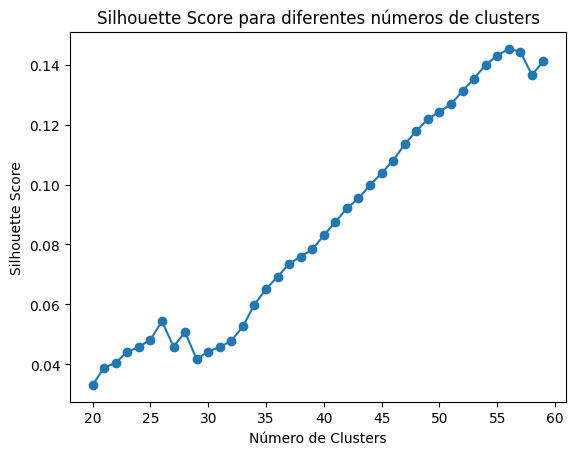

El número óptimo de clusters es 56


In [16]:
# Realizar el clustering jerárquico con el método 'ward'
Z = linkage(X_scaled, method='ward')

sil_scores = []  # Lista para almacenar los Silhouette Scores

# Probar diferentes cantidades de clusters (por ejemplo, de 20 a 60 clusters)
for k in range(20, 60):
    clusters = fcluster(Z, k, criterion='maxclust')  # Asignar los clusters
    score = silhouette_score(X_scaled, clusters)  # Calcular el Silhouette Score
    sil_scores.append(score)

# Graficar los resultados del Silhouette Score
import matplotlib.pyplot as plt

plt.plot(range(20, 60), sil_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Encontrar el número óptimo de clusters
optimal_k = np.argmax(sil_scores) + 20  # +20 porque comenzamos en 20 clusters
print(f"El número óptimo de clusters es {optimal_k}")

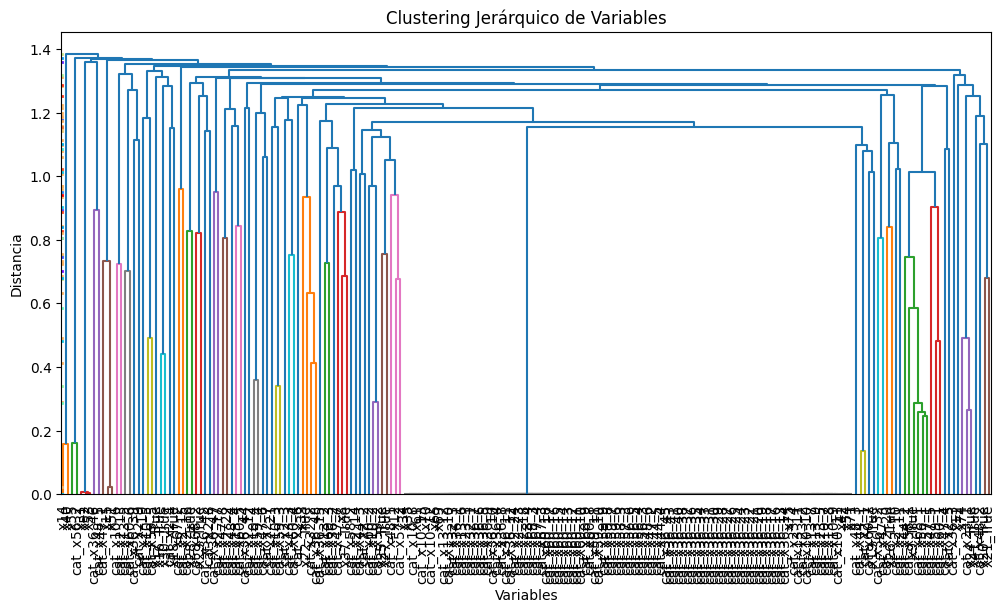

In [17]:
# Crear un DataFrame con las coordenadas
loadings_data_proyecto = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_componentes)], index=X.columns)

# Crear un DataFrame con las coordenadas
loadings_data_proyecto = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_componentes)], index=X.columns)

# Clustering jerárquico
linkage_matrix = linkage(loadings_data_proyecto, method='ward', metric='euclidean')

# Cortar el dendrograma para obtener mejor número de clusters
clusters = fcluster(linkage_matrix, t=optimal_k, criterion='maxclust')

# Dendrograma con no_labels=False para que aparezcan las etiquetas
plt.figure(figsize=(12, 6))
dendro = dendrogram(linkage_matrix, labels=loadings_data_proyecto.index, leaf_rotation=90, leaf_font_size=10, no_labels=False)

# Asignar colores a las ramas según los clusters
for i, d in enumerate(dendro['dcoord']):
    cluster_id = clusters[i]
    # Usamos la distancia para colorear las ramas según el cluster
    color = plt.cm.rainbow(cluster_id / optimal_k)  # Escala de color para los clusters
    plt.plot(d[0:2], [d[1]]*2, color=color, lw=2)  # Primera parte de la rama
    plt.plot(d[2:4], [d[3]]*2, color=color, lw=2)  # Segunda parte de la rama

plt.title('Clustering Jerárquico de Variables')
plt.xlabel('Variables')
plt.ylabel('Distancia')
plt.show()

In [18]:
cluster_assignment = pd.DataFrame({
    'Variable': loadings_data_proyecto.index,  # El índice contiene los nombres de las variables
    'Cluster': clusters
})

# Ver las asignaciones de clústeres
print(cluster_assignment)

     Variable  Cluster
0          x8       36
1         x11       55
2         x12       41
3         x14        1
4         x15        5
..        ...      ...
205  x28_True       17
206  x29_True       18
207  x30_True       12
208  x37_True       36
209  x41_True       54

[210 rows x 2 columns]


In [19]:
# Agrupar las variables por su cluster
clustered_vars = cluster_assignment.groupby('Cluster')['Variable'].apply(list)

In [20]:
# Obtener las cargas del PCA (ya las tienes en loadings_data_proyecto)
# Y las varianzas explicadas por cada componente (pca_optimo.explained_variance_ratio_)
varianza_explicada = pca_optimo.explained_variance_ratio_

# Crear un DataFrame para almacenar el aporte de cada variable a la varianza total
aporte_varianza_cluster = pd.DataFrame(index=loadings_data_proyecto.index)
# Crear un diccionario para almacenar los datos temporalmente
nuevas_columnas = {}

for pc in loadings_data_proyecto.columns:  # Itera sobre las columnas del DataFrame
    nuevas_columnas[pc] = (loadings_data_proyecto[pc] ** 2) * varianza_explicada[int(pc[2]) - 1]

# Combina las nuevas columnas con el DataFrame original
nuevas_columnas_df = pd.DataFrame(nuevas_columnas)
aporte_varianza_cluster = pd.concat([aporte_varianza_cluster, nuevas_columnas_df], axis=1)

Selección de variables menos correlacionadas con mayor capacidad de explicación de la varianza de las componentes

In [21]:
# Inicializamos un diccionario para almacenar la variable más relevante para cada cluster
top_vars_per_cluster = {}

# Iterar sobre cada cluster
for cluster_id in clustered_vars.index:
    # Seleccionamos las variables de este cluster
    variables_in_cluster = clustered_vars[cluster_id]
    
    # Filtramos el DataFrame para las variables del cluster actual
    vars_in_cluster = aporte_varianza_cluster.loc[variables_in_cluster]
    
    # Calculamos el aporte ponderado
    aporte_ponderado = vars_in_cluster.mul(varianza_explicada[:vars_in_cluster.shape[1]], axis=1)
    
    # Calculamos el aporte total ponderado para cada variable
    vars_in_cluster['Aporte_total'] = aporte_ponderado.sum(axis=1)
    
    # Ordenamos las variables por su aporte total
    top_vars = vars_in_cluster.sort_values('Aporte_total', ascending=False)
    
    # Seleccionamos la variable que más explica la varianza en este cluster
    top_vars_per_cluster[cluster_id] = top_vars.index[0]  # Elegimos solo la primera

# Mostrar las variables más relevantes por cluster
for cluster_id, top_var in top_vars_per_cluster.items():
    print(f"Cluster {cluster_id}: {top_var}")

Cluster 1: x40
Cluster 2: cat_x56_2
Cluster 3: x52
Cluster 4: cat_x36_46
Cluster 5: x51
Cluster 6: cat_x10_6
Cluster 7: cat_x60_6
Cluster 8: cat_x36_39
Cluster 9: cat_x2_9
Cluster 10: cat_x59_5
Cluster 11: cat_x2_19
Cluster 12: x16_True
Cluster 13: cat_x2_4
Cluster 14: x18_True
Cluster 15: x17_True
Cluster 16: cat_x2_15
Cluster 17: cat_x2_16
Cluster 18: cat_x68_2
Cluster 19: cat_x36_42
Cluster 20: cat_x2_8
Cluster 21: cat_x36_47
Cluster 22: cat_x47_8
Cluster 23: cat_x13_4
Cluster 24: cat_x48_4
Cluster 25: cat_x36_44
Cluster 26: cat_x2_12
Cluster 27: cat_x10_4
Cluster 28: cat_x47_6
Cluster 29: cat_x10_3
Cluster 30: cat_x2_21
Cluster 31: cat_x60_4
Cluster 32: cat_x2_3
Cluster 33: cat_x36_48
Cluster 34: cat_x2_6
Cluster 35: cat_x60_3
Cluster 36: cat_x47_7
Cluster 37: cat_x36_15
Cluster 38: cat_x58_2
Cluster 39: cat_x2_2
Cluster 40: cat_x59_2
Cluster 41: cat_x48_1
Cluster 42: x35
Cluster 43: cat_x2_1
Cluster 44: cat_x48_3
Cluster 45: cat_x36_32
Cluster 46: cat_x2_20
Cluster 47: cat_x2_11
C

In [22]:
# Paso 1: Extraer todas las variables de top_vars_per_cluster
all_top_vars = []
for cluster_id, top_vars in top_vars_per_cluster.items():
    # Asegurémonos de que top_vars sea una lista de cadenas
    all_top_vars.append(top_vars)

# Paso 2: Limpiar los sufijos numéricos de las variables, quedándonos solo con el prefijo
cleaned_vars = [re.sub(r'_\d+$', '', var) for var in all_top_vars]

# Paso 3: Filtrar las columnas de X_train que coinciden con los prefijos limpios
selected_columns = []

# Iterar sobre los prefijos únicos
for var in set(cleaned_vars):  # Usamos 'set' para evitar repeticiones
    # Encontrar las columnas que comienzan con este prefijo en X_train
    matching_cols = [col for col in X_train.columns if col.startswith(var)]
    
    # Si encontramos coincidencias, seleccionamos la primera columna
    if matching_cols:
        selected_columns.append(matching_cols[0])

# Paso 4: Crear el DataFrame con las columnas seleccionadas
datos_seleccionados = X_train[selected_columns].copy()
datos_seleccionados = datos_seleccionados.loc[:, ~datos_seleccionados.columns.duplicated()]

# Verifica el resultado
print(datos_seleccionados.head())

     cat_x47 cat_x48 cat_x60 cat_x13 cat_x56 cat_x68 cat_x36 cat_x23  x51  \
1838       6       1       2       1       1       1      48       0  0.0   
2217       7       2       3       1       1       1      48       1  0.0   
1424       4       2       1       1       1       1       0       0  0.0   
1888       6       3       2       1       1       1      48       1  0.0   
1036       6       2       2       1       1       1       0       1  0.0   

               x40 cat_x10           x11 cat_x58            x35 cat_x59  x52  
1838  6.130026e+03       2  2.772652e+04       1   0.000000e+00       2  0.0  
2217  4.523866e+03       3  2.046175e+04       1  2.124482e-322       3  0.0  
1424  0.000000e+00       1  0.000000e+00       1  7.410985e-323       1  0.0  
1888  3.345078e+06       1  1.513001e+07       1   0.000000e+00       1  0.0  
1036  3.110301e+03       2  1.406810e+04       1  7.410985e-323       2  0.0  


In [23]:
vars_x = datos_seleccionados.columns.tolist() 
datos_seleccionados['y_dicotomica'] = y_train
X_train = X_train[vars_x]
X_test = X_test[vars_x]
vars_x

['cat_x47',
 'cat_x48',
 'cat_x60',
 'cat_x13',
 'cat_x56',
 'cat_x68',
 'cat_x36',
 'cat_x23',
 'x51',
 'x40',
 'cat_x10',
 'x11',
 'cat_x58',
 'x35',
 'cat_x59',
 'x52']

### Procesadores de datos

Datos numéricos se estandarizan

In [24]:
numerical_features = [var for var in vars_x if not var.startswith('cat')]
numerical_transformer = StandardScaler()

Datos categóricos se codifican con OneHot

In [25]:
categorical_features = [var for var in vars_x if var.startswith('cat')]
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [26]:
for col in categorical_features:
    train_unique = set(X_train[col].unique())
    test_unique = set(X_test[col].unique())
    
    # Compara si todos los valores de X_train están en X_test
    missing_in_test = test_unique - train_unique 
    
    if missing_in_test:
        print(f"Valores en {col} de X_train que no están en X_test: {missing_in_test}")
    else:
        print(f"Todos los valores de {col} en X_train están presentes en X_test.")

Todos los valores de cat_x47 en X_train están presentes en X_test.
Todos los valores de cat_x48 en X_train están presentes en X_test.
Todos los valores de cat_x60 en X_train están presentes en X_test.
Todos los valores de cat_x13 en X_train están presentes en X_test.
Todos los valores de cat_x56 en X_train están presentes en X_test.
Todos los valores de cat_x68 en X_train están presentes en X_test.
Todos los valores de cat_x36 en X_train están presentes en X_test.
Todos los valores de cat_x23 en X_train están presentes en X_test.
Todos los valores de cat_x10 en X_train están presentes en X_test.
Todos los valores de cat_x58 en X_train están presentes en X_test.
Todos los valores de cat_x59 en X_train están presentes en X_test.


Transformador de columnas

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

Define el pipeline

In [28]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),  # SVC necesita probability=True para predict_proba
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "NeuralNetwork": MLPClassifier(),
    "LDA": LinearDiscriminantAnalysis()  
}

# Lista para almacenar los resultados
results = []

# Iterar sobre los modelos y calcular AUC-ROC y Gini para cada uno
for name, classifier in models.items():
    print(f"Training {name}...")
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    
    # Asegurarse de que el modelo tiene el método predict_proba
    if hasattr(model, "predict_proba"):
        y_pred = model.predict_proba(X_test)[:, 1]  # Obtener probabilidades de la clase positiva
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        gini = 2 * roc_auc - 1
    else:
        roc_auc = None
        gini = None
    
    # Añadir los resultados a la lista
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Gini": gini
    })

# Crear un DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar la tabla de resultados
print(results_df)

Training LogisticRegression...
Training DecisionTree...
Training SVM...
Training RandomForest...
Training XGBoost...
Training KNN...
Training NeuralNetwork...
Training LDA...
                Model  Accuracy   ROC AUC      Gini
0  LogisticRegression  0.984772  0.714395  0.428790
1        DecisionTree  0.959391  0.519855  0.039710
2                 SVM  0.984772  0.585911  0.171821
3        RandomForest  0.983080  0.543528  0.087056
4             XGBoost  0.981387  0.679935  0.359870
5                 KNN  0.983080  0.507064  0.014128
6       NeuralNetwork  0.983080  0.663039  0.326079
7                 LDA  0.971235  0.614738  0.229477


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
# Crear un diccionario para almacenar las probabilidades de la categoría 1 por modelo
probabilities_class_1 = {}

# Iterar sobre los modelos
for name, classifier in models.items():
    print(f"Training {name}...")
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    model.fit(X_train, y_train)
    
    # Verificar si el modelo tiene el método predict_proba
    if hasattr(model, "predict_proba"):
        # Capturar solo las probabilidades de la categoría 1
        y_pred_prob_class_1 = model.predict_proba(X_test)[:, 1]
        probabilities_class_1[name] = y_pred_prob_class_1
    else:
        print(f"{name} does not support predict_proba.")


# Convertir las probabilidades en un DataFrame
probabilities_df = pd.DataFrame(probabilities_class_1)

# Agregar las etiquetas reales
probabilities_df["y_test"] = y_test.values

# Mostrar las primeras filas del DataFrame
print(probabilities_df.head())

Training LogisticRegression...
Training DecisionTree...
Training SVM...
Training RandomForest...
Training XGBoost...
Training KNN...
Training NeuralNetwork...
Training LDA...
   LogisticRegression  DecisionTree       SVM  RandomForest   XGBoost  KNN  \
0            0.053289      0.117647  0.038660      0.111614  0.122304  0.0   
1            0.013805      0.000000  0.026477      0.000000  0.000267  0.0   
2            0.016250      0.000000  0.017406      0.013333  0.000313  0.0   
3            0.017052      0.058824  0.038396      0.067172  0.061693  0.0   
4            0.016366      1.000000  0.022751      0.020000  0.004590  0.0   

   NeuralNetwork       LDA  y_test  
0       0.088334  0.029055       0  
1       0.000001  0.004604       0  
2       0.000013  0.288643       0  
3       0.026932  0.008675       0  
4       0.004879  0.007594       0  


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
probabilities_df

,LogisticRegression,DecisionTree,SVM,RandomForest,XGBoost,KNN,NeuralNetwork,LDA,y_test
0,0.053289,0.117647,0.038660,0.111614,0.122304,0.0,0.088334,0.029055,0
1,0.013805,0.000000,0.026477,0.000000,0.000267,0.0,0.000001,0.004604,0
2,0.016250,0.000000,0.017406,0.013333,0.000313,0.0,0.000013,0.288643,0
3,0.017052,0.058824,0.038396,0.067172,0.061693,0.0,0.026932,0.008675,0
4,0.016366,1.000000,0.022751,0.020000,0.004590,0.0,0.004879,0.007594,0
...,...,...,...,...,...,...,...,...,...
586,0.056883,0.285714,0.033979,0.072439,0.044957,0.0,0.119260,0.102264,0
587,0.008179,0.000000,0.026361,0.020000,0.001126,0.0,0.000073,0.002198,0
588,0.005618,0.000000,0.017632,0.000000,0.000605,0.0,0.000056,0.004880,0
589,0.016039,0.000000,0.034996,0.010000,0.001461,0.0,0.011644,0.005009,0


In [31]:
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['Baja', 'Media-Baja', 'Media-Alta', 'Alta']

# Aplicar pd.cut a cada columna del DataFrame
categories_df = probabilities_df.apply(lambda col: pd.cut(col, bins=bins, labels=labels, include_lowest=True))
categories_df

,LogisticRegression,DecisionTree,SVM,RandomForest,XGBoost,KNN,NeuralNetwork,LDA,y_test
0,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja
1,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja
2,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Media-Baja,Baja
3,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja
4,Baja,Alta,Baja,Baja,Baja,Baja,Baja,Baja,Baja
...,...,...,...,...,...,...,...,...,...
586,Baja,Media-Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja
587,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja
588,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja
589,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja,Baja


In [32]:
quantiles = probabilities_df.quantile([0, 0.25, 0.5, 0.75, 1])
quantiles

,LogisticRegression,DecisionTree,SVM,RandomForest,XGBoost,KNN,NeuralNetwork,LDA,y_test
0.00,0.000039,0.0,0.009483,0.000000,0.000010,0.0,6.127647e-23,0.000382,0.0
0.25,0.008746,0.0,0.024101,0.000000,0.000476,0.0,1.234787e-04,0.004951,0.0
0.50,0.020025,0.0,0.031885,0.000000,0.001838,0.0,3.391029e-03,0.010249,0.0
0.75,0.039298,0.0,0.038288,0.030000,0.012205,0.0,2.356655e-02,0.020545,0.0
1.00,0.287083,1.0,0.061272,0.631202,0.622395,0.6,5.693432e-01,0.970253,1.0


In [33]:
columns_to_remove = ['DecisionTree', 'RandomForest', 'KNN', 'y_test']
probabilities_df_cleaned = probabilities_df.drop(columns=columns_to_remove)
probabilities_df_cleaned

,LogisticRegression,SVM,XGBoost,NeuralNetwork,LDA
0,0.053289,0.038660,0.122304,0.088334,0.029055
1,0.013805,0.026477,0.000267,0.000001,0.004604
2,0.016250,0.017406,0.000313,0.000013,0.288643
3,0.017052,0.038396,0.061693,0.026932,0.008675
4,0.016366,0.022751,0.004590,0.004879,0.007594
...,...,...,...,...,...
586,0.056883,0.033979,0.044957,0.119260,0.102264
587,0.008179,0.026361,0.001126,0.000073,0.002198
588,0.005618,0.017632,0.000605,0.000056,0.004880
589,0.016039,0.034996,0.001461,0.011644,0.005009


In [34]:
categories_df = probabilities_df_cleaned.apply(
    lambda col: pd.cut(
        col,
        bins=col.quantile([0, 0.25, 0.5, 0.75, 1]).values,  # Usar los cuantiles como límites
        labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'],
        include_lowest=True
    )
)

categories_df.columns = [f'cat_{col}' for col in categories_df.columns]
print("\nDataFrame con categorías basadas en los cuantiles de cada columna:")
print(categories_df)


DataFrame con categorías basadas en los cuantiles de cada columna:
    cat_LogisticRegression     cat_SVM cat_XGBoost cat_NeuralNetwork  \
0                     Alta        Alta        Alta              Alta   
1               Media-Baja  Media-Baja        Baja              Baja   
2               Media-Baja        Baja        Baja              Baja   
3               Media-Baja        Alta        Alta              Alta   
4               Media-Baja        Baja  Media-Alta        Media-Alta   
..                     ...         ...         ...               ...   
586                   Alta  Media-Alta        Alta              Alta   
587                   Baja  Media-Baja  Media-Baja              Baja   
588                   Baja        Baja  Media-Baja              Baja   
589             Media-Baja  Media-Alta  Media-Baja        Media-Alta   
590             Media-Baja        Baja        Baja              Baja   

        cat_LDA  
0          Alta  
1          Baja  
2          Al

In [35]:
df_categorias_metodos = pd.concat([probabilities_df_cleaned, categories_df,probabilities_df['y_test']], axis=1)
df_categorias_metodos

,LogisticRegression,SVM,XGBoost,NeuralNetwork,LDA,cat_LogisticRegression,cat_SVM,cat_XGBoost,cat_NeuralNetwork,cat_LDA,y_test
0,0.053289,0.038660,0.122304,0.088334,0.029055,Alta,Alta,Alta,Alta,Alta,0
1,0.013805,0.026477,0.000267,0.000001,0.004604,Media-Baja,Media-Baja,Baja,Baja,Baja,0
2,0.016250,0.017406,0.000313,0.000013,0.288643,Media-Baja,Baja,Baja,Baja,Alta,0
3,0.017052,0.038396,0.061693,0.026932,0.008675,Media-Baja,Alta,Alta,Alta,Media-Baja,0
4,0.016366,0.022751,0.004590,0.004879,0.007594,Media-Baja,Baja,Media-Alta,Media-Alta,Media-Baja,0
...,...,...,...,...,...,...,...,...,...,...,...
586,0.056883,0.033979,0.044957,0.119260,0.102264,Alta,Media-Alta,Alta,Alta,Alta,0
587,0.008179,0.026361,0.001126,0.000073,0.002198,Baja,Media-Baja,Media-Baja,Baja,Baja,0
588,0.005618,0.017632,0.000605,0.000056,0.004880,Baja,Baja,Media-Baja,Baja,Baja,0
589,0.016039,0.034996,0.001461,0.011644,0.005009,Media-Baja,Media-Alta,Media-Baja,Media-Alta,Media-Baja,0


In [39]:
print(df_categorias_metodos.groupby('cat_LogisticRegression')['y_test'].sum())
print(df_categorias_metodos.groupby('cat_XGBoost')['y_test'].sum())


cat_LogisticRegression
Baja          0
Media-Baja    1
Media-Alta    4
Alta          4
Name: y_test, dtype: int64
cat_XGBoost
Baja          0
Media-Baja    2
Media-Alta    3
Alta          4
Name: y_test, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9208\196270673.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_categorias_metodos.groupby('cat_LogisticRegression')['y_test'].sum())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9208\196270673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_categorias_metodos.groupby('cat_XGBoost')['y_test'].sum())


In [44]:
print(df_categorias_metodos['cat_LogisticRegression'].value_counts() )
print(df_categorias_metodos['cat_XGBoost'].value_counts() )
print(df_categorias_metodos['cat_LDA'].value_counts() )


cat_LogisticRegression
Baja          148
Media-Baja    148
Alta          148
Media-Alta    147
Name: count, dtype: int64
cat_XGBoost
Baja          148
Media-Baja    148
Alta          148
Media-Alta    147
Name: count, dtype: int64
cat_LDA
Baja          148
Media-Baja    148
Alta          148
Media-Alta    147
Name: count, dtype: int64


### Creación de un procesador según Alex Ramírez (WOEs)

In [36]:
class WOECreator(BaseEstimator, TransformerMixin): 
    def __init__(self): 
        self.dfT_ = None 

    def fit(self, X, y): 
        if isinstance(X, pd.DataFrame):
            dfX = X.reset_index(drop=True)
        else:
            dfX = pd.DataFrame(data = {'X' : X}).reset_index(drop=True)  

        if isinstance(y,pd.DataFrame):
            y = y.values
        elif isinstance(y,pd.Series):
            y = y.to_numpy()

        self.dfT_ = list()
        for col in dfX.columns:
            dfXcol = dfX[[col]].copy()
            dfXcol['y'] = y
            dfXcol.rename(columns={col:'X'},inplace=True)
            dfT = dfXcol[['X','y']].groupby('X').agg({'y':['sum','count']})
            dfT.columns = ['malo','total']
            dfT['probMalo'] = dfT['malo'] / dfT['total']
            dfT['bueno'] = dfT['total']-dfT['malo']
            dfT['distBad'] = dfT['malo'] / dfT['malo'].sum() 
            dfT['distGood'] = dfT['bueno'] / dfT['bueno'].sum()
            dfT['woe'] = np.log(dfT['distBad']/dfT['distGood'])
            dfT.reset_index(inplace=True)

            self.dfT_.append(dfT)       
        return self 
        
    def transform(self, X, y=None): 
        if isinstance(X, pd.DataFrame):
            dfX = X.reset_index(drop=True)
        else:
            dfX = pd.DataFrame(data = {'X' : X}).reset_index(drop=True)  

        dfWoes = pd.DataFrame(index = dfX.index)
        ncol = len(dfX.columns)
        for ind in range(0,ncol):
            dfXcol = dfX.iloc[:,[ind]].copy()
            dfXcol.rename(columns={dfXcol.columns[0]:'X'},inplace=True)            
            dfXcol = dfXcol.merge(self.dfT_[ind], on='X',how='left')        
            dfWoes[ind] = dfXcol['woe']

        return dfWoes.values.reshape(-1,ncol)